In [3]:
# Author: Chun-Yi Chen

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os 
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import TfidfVectorizer

# EDA and data preprocessing 

In [3]:
books = pd.read_csv(r"C:\Users\omogh\Desktop\Web Mining Project\data\Clean book data.csv",index_col=0)
rating = pd.read_csv(r"C:\Users\omogh\Desktop\Web Mining Project\data\Ratings.csv")
user = pd.read_csv(r"C:\Users\omogh\Desktop\Web Mining Project\data\Users.csv")

In [4]:
# there's some books with the same ISBN
books[~books.index.isin(books.drop_duplicates(subset=["ISBN"]).index)].ISBN

8631    006103097X
8633    0380763621
8637    0380709937
8641    0380715740
8643    0380709945
8649    0394547020
8651    0553204262
8656    0671460978
8663    0060611626
8668    0671578294
8678    0671665790
8680    0395276284
8682    0140094296
8692    0066620996
8694    0446667900
8705    0553579312
8707    055357924X
8709    0425153088
8713    0425141977
8715    0060616598
8717    0802130720
8726    0140043888
8744    0804114897
8750    0804111421
9960    087975446X
9964    0842329293
Name: ISBN, dtype: object

In [5]:
# the data is slightly different 
books[books.ISBN == "006103097X"]

,Id,Name,RatingDist1,pagesNumber,RatingDist4,RatingDistTotal,PublishMonth,PublishDay,Publisher_x,CountsOfReview,...,PagesNumber,Book-Title,Book-Author,Year-Of-Publication,Publisher_y,Image-URL-S,Image-URL-M,Image-URL-L,Genre,Genre_user_amount
8630,76760,"Hope to Die (Matthew Scudder, #15)",1:14,400,4:925,total:2114,5,11,HarperTorch,130,...,NaN,Hope to Die: A Matthew Scudder Crime Novel (Ma...,Lawrence Block,2002,HarperTorch,http://images.amazon.com/images/P/006103097X.0...,http://images.amazon.com/images/P/006103097X.0...,http://images.amazon.com/images/P/006103097X.0...,Mystery|Fiction|Mystery|Crime|Mystery|Detectiv...,87|44|38|12|11|6|5|4|3|3|
8631,76760,"Hope to Die (Matthew Scudder, #15)",1:14,400,4:926,total:2115,5,11,HarperTorch,130,...,NaN,Hope to Die: A Matthew Scudder Crime Novel (Ma...,Lawrence Block,2002,HarperTorch,http://images.amazon.com/images/P/006103097X.0...,http://images.amazon.com/images/P/006103097X.0...,http://images.amazon.com/images/P/006103097X.0...,Mystery|Fiction|Mystery|Crime|Mystery|Detectiv...,87|44|38|12|11|6|5|4|3|3|


In [6]:
books = books.drop_duplicates(subset=["ISBN"])

In [7]:
print("Number of unique rating:",len(rating.loc[:,["User-ID","ISBN"]].drop_duplicates()))
print("Number of unique user id:",len(rating.loc[:,["User-ID"]].drop_duplicates()))
print("Number of unique ISBN:",len(rating.loc[:,["ISBN"]].drop_duplicates()))
rating.head()

Number of unique rating: 1149780
Number of unique user id: 105283
Number of unique ISBN: 340556


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [8]:
# since we don't have all books in the database
# we need to remove part of the rating that not include in our books dataset
book_ISBN_list = books.ISBN.unique().tolist()
rating_ISBN = rating.ISBN
Filtered_rating = rating[rating_ISBN.isin(book_ISBN_list)].reset_index(drop = True)
Filtered_rating.head()

,User-ID,ISBN,Book-Rating
0,276746,0553561618,0
1,276747,0679776818,8
2,276748,0747558167,6
3,276762,034544003X,0
4,276798,3548603203,6


In [9]:
Filtered_rating.groupby(by = "User-ID").count().head()

,ISBN,Book-Rating
User-ID,,
9,1,1
39,1,1
44,1,1
67,1,1
75,1,1


In [10]:
books_Genre = pd.DataFrame(books.Genre.str.split("|",expand=True))
Genre_count = books_Genre.groupby(by = 1).count().iloc[1:,:]

In [11]:
filter_count = Genre_count[Genre_count>30].dropna().sort_values(by = 0)
print(filter_count.shape)

(32, 10)


In [12]:
file_path = os.path.abspath(os.path.curdir)
results_dir = os.path.join(file_path, 'img/')

In [13]:
def plot_barh(data,xlabel,ylabel,title,savename,xtickfont = 10, ytickfont = 10,figsize = (10,6)):
    file_path = os.path.abspath(os.path.curdir)
    results_dir = os.path.join(file_path, 'img/')
    if not os.path.isdir(results_dir):
        os.makedirs(results_dir)

    
    plt.figure(figsize=figsize)
    plt.barh(width = data.iloc[:,0], y = data.index)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.yticks(fontsize=ytickfont)
    plt.title(title, fontsize = 14)
    plt.tight_layout()
    plt.savefig(results_dir + savename)

In [14]:
def plot_dist(data,xlabel,ylabel,title,savename,xtickfont = 10, ytickfont = 10,figsize = (10,6),Bin = 10, xlim = None):
    file_path = os.path.abspath(os.path.curdir)
    results_dir = os.path.join(file_path, 'img/')
    if not os.path.isdir(results_dir):
        os.makedirs(results_dir)

    
    plt.figure(figsize=figsize)
    sns.distplot(data,bins=Bin,kde=False)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.yticks(fontsize=ytickfont)
    if xlim != None:
        plt.xlim(xlim)
    plt.title(title, fontsize = 14)
    plt.tight_layout()
    plt.savefig(results_dir + savename)

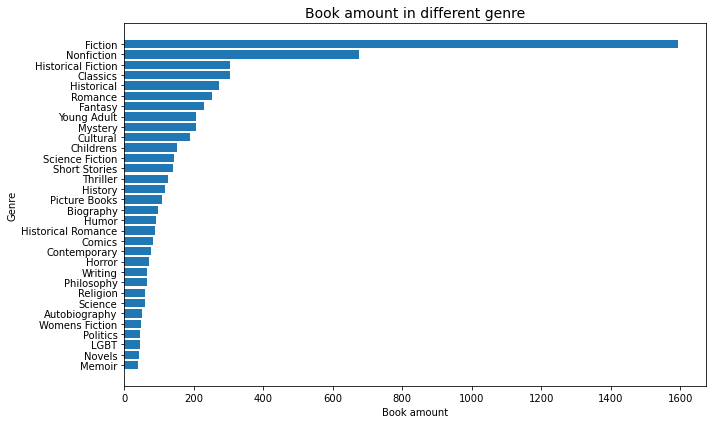

In [17]:
plot_barh(filter_count,"Book amount","Genre","Book amount in different genre","Book amount in different genre.png")

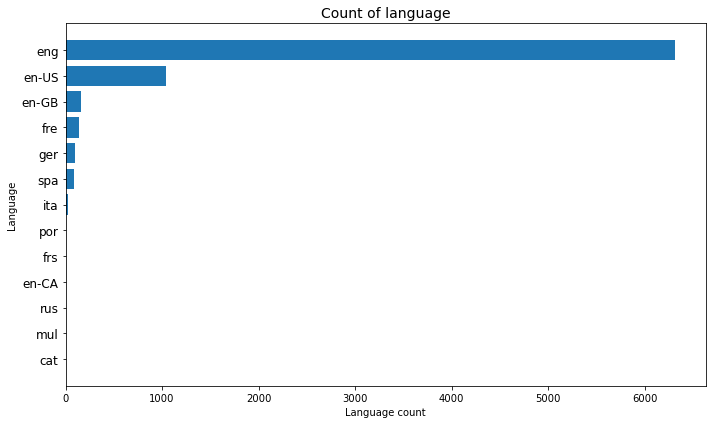

In [15]:
plot_barh(books.groupby(by = "Language").count().sort_values(by = "Id"),"Language count","Language","Count of language","Count of language.png",ytickfont=12)

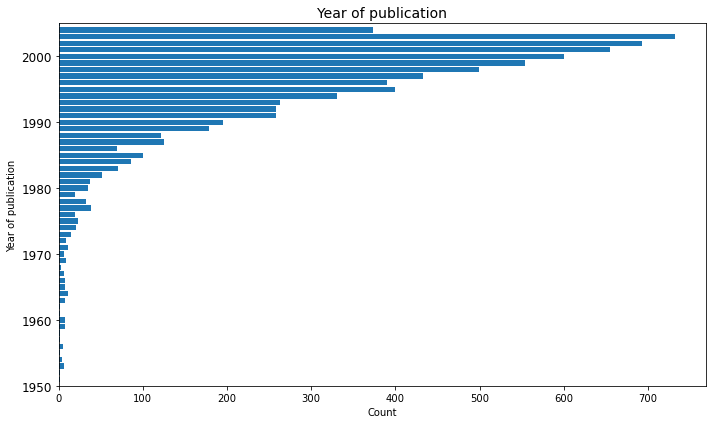

In [16]:
plot_barh(books.groupby(by = "Year-Of-Publication").count().sort_values(by = "Id"),"Count","Year of publication","Year of publication","Count of Year of publication.png",ytickfont=12)
plt.ylim(1950,2005)
plt.tight_layout()
plt.savefig(results_dir + "Count of Year of publication.png")

C:\Users\omogh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(-10.0, 400.0)

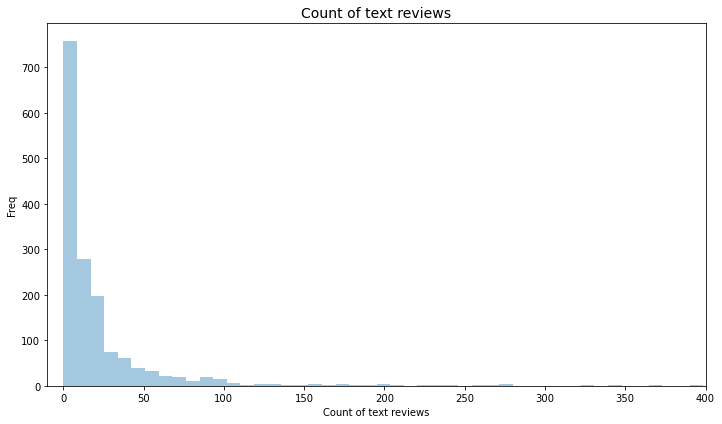

In [17]:
plot_dist(books.loc[:,"Count of text reviews"].dropna(),"Count of text reviews","Freq","Count of text reviews","Count of text reviews.png",xtickfont=12,Bin= 100)
plt.xlim(-10,400)

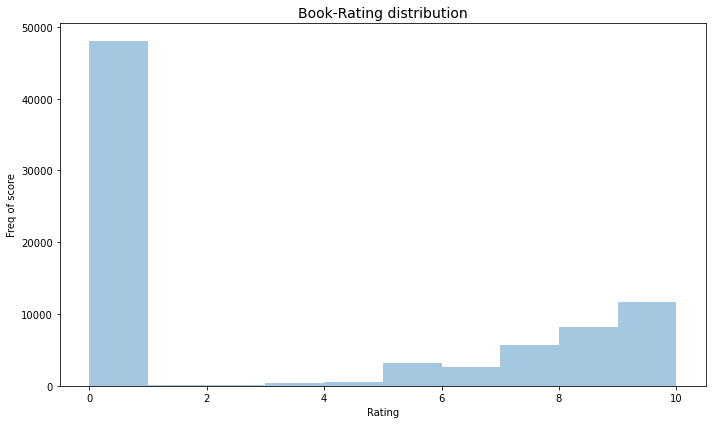

In [18]:
plot_dist(Filtered_rating.loc[:,"Book-Rating"],"Rating","Freq of score","Book-Rating distribution","Book-Rating distribution.png",xtickfont=12,Bin=10)

In [19]:
# as long as we filtered the user rating less than 1 time
# the ramaining rate will be lower than 40% 
# our user amount is too much for this amount of books so we filtered it
conditon_func = lambda x : len(x) >= 2
rating_f = Filtered_rating.groupby(by = "User-ID").filter(conditon_func)
book_rating_list = rating_f.ISBN.unique().tolist()
Filtered_books = books[books.ISBN.isin(book_rating_list)]

print(f"Preserve rate of books : {len(rating_f.ISBN.unique())}")
print(f"Preserve rate of books : {len(rating_f.ISBN.unique())/len(Filtered_books.ISBN.unique())*100:.2f}%")
print(f"Preserve rate of users : {len(rating_f.loc[:,'User-ID'].unique())}")
print(f"Preserve rate of users : {len(rating_f.loc[:,'User-ID'].unique())/len(Filtered_rating.loc[:,'User-ID'].unique())*100:.2f}%")


Preserve rate of books : 7462
Preserve rate of books : 100.00%
Preserve rate of users : 8359
Preserve rate of users : 38.39%


In [20]:
rating_f

,User-ID,ISBN,Book-Rating
11,276875,0688172377,0
12,276875,8806155873,0
15,276925,0140154078,6
16,276925,0151010633,0
17,276925,0316666343,0
...,...,...,...
80456,276688,0553572512,7
80457,276688,0553575090,7
80458,276688,0684195569,10
80459,276688,0836218655,10


In [21]:
len(rating_f.loc[:,"User-ID"].unique())//len(Filtered_rating.loc[:,"User-ID"].unique())*100

0

C:\Users\omogh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


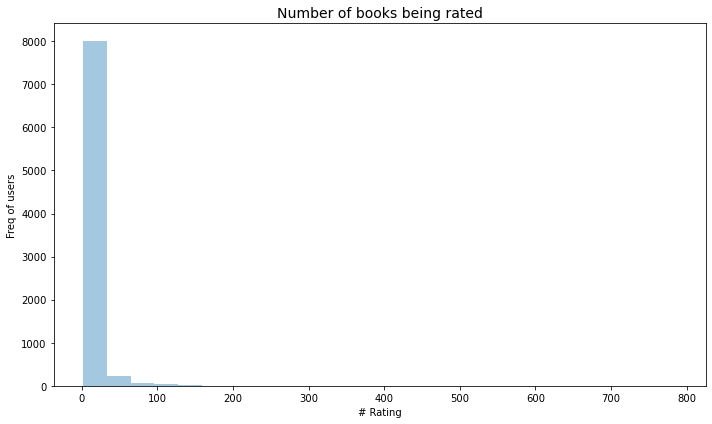

In [22]:
# (almost 70% )most of the users are only rating once
plot_dist(rating_f.groupby(by = "User-ID").size(),"# Rating","Freq of users","Number of books being rated","Number of books being rated.png",xtickfont=12,Bin=25)

# Collaborative Filtering RS

In [23]:
rating_f1 = pd.merge(Filtered_books[["ISBN"]],rating_f,on = "ISBN", how = "right")
rating_f1.head()

,ISBN,User-ID,Book-Rating
0,0688172377,276875,0
1,8806155873,276875,0
2,0140154078,276925,6
3,0151010633,276925,0
4,0316666343,276925,0


In [24]:
# create UserID-ISBN sparse matrix
rating_f2 = rating_f1.pivot_table(index="ISBN", columns="User-ID",values="Book-Rating").fillna(0)
rating_f2.head()

User-ID,114,165,242,243,254,272,383,388,408,424,...,278418,278535,278545,278552,278582,278586,278633,278637,278771,278843
ISBN,,,,,,,,,,,,,,,,,,,,,
0002317850,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0002727463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0006163831,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0006345530,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0006512674,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
user_correlation =  1 - pairwise_distances(rating_f2.T, metric="cosine")
user_correlation[np.isnan(user_correlation)] = 0

In [26]:
item_correlation =  1 - pairwise_distances(rating_f2, metric="cosine")
item_correlation[np.isnan(item_correlation)] = 0

In [27]:
print(f"Shape of user similarity matrix:{user_correlation.shape}")
print(f"Shape of item similarity matrix:{item_correlation.shape}")

Shape of user similarity matrix:(8359, 8359)
Shape of item similarity matrix:(7462, 7462)


In [28]:
# copied from the lab1
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        # Use np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
        #pred = 0 + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        mean_item_rating = ratings.mean(axis=0)
        ratings_diff = (ratings - mean_item_rating[np.newaxis, :])
        #pred = 0 + ratings_diff.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
        # not sure why this is not a np.array so can't apply clip
        pred = mean_item_rating[np.newaxis, :] + ratings_diff.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
        pred = np.array(pred)
    elif type == 'content':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
        pred = np.array(pred)
    return pred.clip(min = 0)

In [29]:
user_prediction = predict(rating_f2.T, user_correlation, type='user').clip(min = 0)
item_prediction = predict(rating_f2.T, item_correlation, type='item').clip(min = 0)

<ipython-input-28-2731937711c0>:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
<ipython-input-28-2731937711c0>:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
<ipython-input-28-2731937711c0>:7: RuntimeWarning: invalid value encountered in true_divide
  pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
<ipython-input-28-2731937711c0>:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert

In [30]:
user_pred_df = pd.DataFrame(user_prediction, columns = list(Filtered_books.ISBN)).fillna(0)
item_pred_df = pd.DataFrame(item_prediction, columns = list(Filtered_books.ISBN)).fillna(0)

In [31]:
def recommend_books(pred_df, userID, books, original_ratings, num_recommendations, method_name):
    # Get and sort the user's predictions
    user_row_number = userID - 1 # User ID starts at 1, not 0
    sorted_user_predictions = pred_df.iloc[user_row_number].sort_values(ascending=False) # User ID starts at 1
    original_ratings = original_ratings.sort_values(by= "User-ID",ascending=False)
    # Get the user's data and merge in the books information.
    
    # ID might not exist so pick up a user that actually exist
    real_ID_list = original_ratings.drop_duplicates(subset ="User-ID").loc[:,"User-ID"]
    real_ID = real_ID_list.iloc[user_row_number]
    user_data = original_ratings[original_ratings.loc[:,"User-ID"] == (real_ID)]
    user_full = (user_data.merge(books, how = 'left', left_on = 'ISBN', right_on = 'ISBN').
                     sort_values(['Book-Rating'], ascending=False)
                 )
    
    # Recommend the highest predicted rating books that the user hasn't seen yet.
    recommendations = (books[~books['ISBN'].isin(user_full['ISBN'])].
         merge(pd.DataFrame(sorted_user_predictions).rename_axis('ISBN').reset_index(), how = 'left',
               left_on = 'ISBN',
               right_on = 'ISBN').
         rename(columns = {user_row_number: method_name}).
         sort_values(method_name, ascending = False).
                       iloc[:num_recommendations, :]
                      )
    # specify column for user/item base
    try:
        user_full = user_full.loc[:,["Id","Name","ISBN","Publisher_x","Genre"]]
        recommendations = recommendations.loc[:,["Id","Name","ISBN","Publisher_x","Genre", method_name]]
    except:
        pass
    return user_full, recommendations

In [32]:
# user 2
print("Collaborative Filtering RS (user-based)")
user_full, recommendations = recommend_books(user_pred_df, 2, Filtered_books, rating_f1, 10, 'CF_user_pred_rating')
recommendations


Collaborative Filtering RS (user-based)


,Id,Name,ISBN,Publisher_x,Genre,CF_user_pred_rating
315,9444,The Complete Collected Poems,067942895X,Random House,Poetry|Classics|Feminism|Nonfiction|Cultural|A...,6.162680
3254,81039,"Silver Birch, Blood Moon",0380786222,Eos,Fantasy|Short Stories|Fantasy|Fairy Tales|Anth...,1.843908
1433,39305,"Minion (Vampire Huntress, #1)",0312987013,St. Martin's Paperback,Paranormal|Vampires|Fantasy|Urban Fantasy|Fant...,0.728427
1424,38951,The Day My Butt Went Psycho,0439424690,"Scholastic, Inc.",Childrens|Humor|Fantasy|Fiction|Young Adult|Ch...,0.441344
3267,81840,Murder Machine,0451403878,Berkley Books,Crime|True Crime|Nonfiction|Mystery|Crime|Hist...,0.421917
5703,159299,KnitLit: Sweaters and Their Stories...and Othe...,0609808249,Harmony,Crafts|Knitting|Nonfiction|Short Stories|Art|C...,0.281151
4555,110457,Nadja,0802150268,Grove Press,Fiction|Cultural|France|Classics|Literature|Eu...,0.248084
2412,61924,"Freedom's Choice (Catteni, #2)",0441005314,Ace,Science Fiction|Fantasy|Fiction|Science Fictio...,0.236764
2965,76969,"The Secret of the Caves (The Hardy Boys, #7)",0448089076,Grosset & Dunlap,Mystery|Fiction|Young Adult|Childrens|Adventur...,0.222964
3238,80583,Messengers of God: Biblical Portraits and Legends,067154134X,Simon & Schuster,Religion|Religion|Judaism|Literature|Jewish|No...,0.211640


In [33]:
# item 1
print('Collaborative Filtering RS (item-based)')
user_full, recommendations = recommend_books(item_pred_df, 2, Filtered_books, rating_f1, 10, 'CF_item_pred_rating')
recommendations

Collaborative Filtering RS (item-based)


,Id,Name,ISBN,Publisher_x,Genre,CF_item_pred_rating
7072,1171871,Monet: The Ultimate Impressionist,0810928833,Harry N. Abrams,Art|Biography|Nonfiction|Art|Art History|,0.800041
5364,144112,"Brotherhood of the Wolf (Runelords, #2)",0812570693,Tor Fantasy,Fantasy|Fiction|Fantasy|Epic Fantasy|Science F...,0.548887
7131,1179722,In Praise of Younger Men (Three Heroes #1; Com...,0451203801,Signet,Romance|Historical Romance|Romance|Anthologies...,0.492095
315,9444,The Complete Collected Poems,067942895X,Random House,Poetry|Classics|Feminism|Nonfiction|Cultural|A...,0.470967
447,12335,Savage Beauty: The Life of Edna St. Vincent Mi...,0375760814,Random House Trade,Biography|Nonfiction|Poetry|Biography Memoir|H...,0.435378
651,17658,Trauma,0451205553,Signet,Horror|Fiction|Fantasy|,0.418918
7153,1182325,High Hopes: The Amityville Murders,0440135427,Dell,Crime|True Crime|Nonfiction|Fantasy|,0.418918
1433,39305,"Minion (Vampire Huntress, #1)",0312987013,St. Martin's Paperback,Paranormal|Vampires|Fantasy|Urban Fantasy|Fant...,0.418224
5185,135920,"The Fourth Deadly Sin (Deadly Sins, #5)",0425090787,Berkley,Mystery|Fiction|Thriller|Mystery|Crime|Suspens...,0.399553
6996,1158997,Altered States,0679773258,Vintage,Fiction|Literary Fiction|Novels|Classics|Europ...,0.395676


In [34]:
# user 1
print("Collaborative Filtering RS (user-based)")
user_full, recommendations = recommend_books(user_pred_df, 1, Filtered_books, rating_f1, 10, 'CF_user_pred_rating')
recommendations


Collaborative Filtering RS (user-based)


,Id,Name,ISBN,Publisher_x,Genre,CF_user_pred_rating
3251,81039,"Silver Birch, Blood Moon",0380786222,Eos,Fantasy|Short Stories|Fantasy|Fairy Tales|Anth...,6.687907
3481,88007,The Wind from Hastings,1568496133,Buccaneer Books,Historical|Historical Fiction|Fiction|Historic...,1.248041
3254,81122,"Dark Dance (Blood Opera Sequence, #1)",044021274X,Dell,Horror|Paranormal|Vampires|Fantasy|Fiction|Got...,0.598390
3235,80583,Messengers of God: Biblical Portraits and Legends,067154134X,Simon & Schuster,Religion|Religion|Judaism|Literature|Jewish|No...,0.512321
1433,39305,"Minion (Vampire Huntress, #1)",0312987013,St. Martin's Paperback,Paranormal|Vampires|Fantasy|Urban Fantasy|Fant...,0.410913
5438,148251,The Jaguar Knights,0060555114,Harper Voyager,Fantasy|Fiction|Adventure|Fantasy|Epic Fantasy...,0.396039
3242,80763,Use Your Perfect Memory: Dramatic New Techniqu...,0452266068,Plume Books,Self Help|Psychology|Nonfiction|Neuroscience|,0.372348
3233,80518,Four Major Plays 2: Ghosts/An Enemy of the Peo...,0451528034,Signet Classics,Drama|Plays|Fiction|Classics|European Literatu...,0.361070
3243,80781,The Perfect Summer,0553584049,Bantam,Romance|Fiction|Womens Fiction|Chick Lit|Myste...,0.357578
3264,81840,Murder Machine,0451403878,Berkley Books,Crime|True Crime|Nonfiction|Mystery|Crime|Hist...,0.355856


In [35]:
# item 2
print('Collaborative Filtering RS (item-based)')
user_full, recommendations = recommend_books(item_pred_df, 1, Filtered_books, rating_f1, 10, 'CF_item_pred_rating')
recommendations

Collaborative Filtering RS (item-based)


,Id,Name,ISBN,Publisher_x,Genre,CF_item_pred_rating
5424,147802,Black Water 2: More Tales of the Fantastic,0517575590,Three Rivers Press,Short Stories|Fantasy|Fiction|Horror|Anthologi...,2.013268
447,12335,Savage Beauty: The Life of Edna St. Vincent Mi...,0375760814,Random House Trade,Biography|Nonfiction|Poetry|Biography Memoir|H...,0.793342
5311,141828,L'Écume des jours,2253140872,Le Livre de Poche,Fiction|Cultural|France|Classics|European Lite...,0.784068
5230,138009,The Listeners,0812550390,Tor Books,Horror|Young Adult|Fiction|Science Fiction|Fan...,0.720531
1496,40995,Sword & Citadel (The Book of the New Sun #3-4),0312890184,Orb Books,Fantasy|Science Fiction|Fiction|Science Fictio...,0.584766
2051,52785,To Jerusalem and Back,0141180757,Penguin Classics,Travel|Nonfiction|History|Literature|Jewish|Cu...,0.540066
5200,136993,Whispers: The Voices of Paranoia,0684802856,Simon & Schuster,Psychology|Nonfiction|Health|Mental Health|Sci...,0.538758
3452,87247,Der Steppenwolf,3518366750,Suhrkamp,Fiction|Classics|Philosophy|European Literatur...,0.433520
1433,39305,"Minion (Vampire Huntress, #1)",0312987013,St. Martin's Paperback,Paranormal|Vampires|Fantasy|Urban Fantasy|Fant...,0.413498
6139,178930,The Overworked American: The Unexpected Declin...,046505434X,Basic Books,Nonfiction|Sociology|Economics|History|Politic...,0.390127


In [36]:
user_full

,Id,Name,ISBN,Publisher_x,Genre
1,77649,The Bonesetter's Daughter,0399146431,G.P. Putnam's,Fiction|Historical|Historical Fiction|Cultural...
0,48899,Mary Anne and the Silent Witness (Baby-Sitters...,0590228684,Scholastic,Mystery|Childrens|Middle Grade|Fiction|Childre...
2,5191,The Pilot's Wife,0316601950,Back Bay Books,Fiction|Womens Fiction|Chick Lit|Mystery|Conte...
3,77753,Little Altars Everywhere,0060976845,Harper Perennial,Fiction|Womens Fiction|Chick Lit|American|Sout...
4,131157,Jacqueline Susann's Shadow Of The Dolls,0609605852,Crown,Fiction|Womens Fiction|Chick Lit|Romance|Conte...
5,1107332,A Cup of Comfort for Women: Stories that celeb...,158062748X,Cup of Comfort,Nonfiction|Inspirational|Short Stories|


# content base RS

In [37]:
# Create a merge dataframe of book name, genres
# this indicates the content information of the books
book_rating_list = rating_f.ISBN.unique().tolist()
Filtered_books = books[books.ISBN.isin(book_rating_list)]

merge = Filtered_books.loc[:,["Name","ISBN","Genre"]]
merge.Genre = merge.Genre.str.replace(" ","-")
merge.Genre = merge.Genre.str.replace("|"," ")
merge.head()

<ipython-input-37-88e51a8064b4>:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  merge.Genre = merge.Genre.str.replace("|"," ")


,Name,ISBN,Genre
0,Harry Potter and the Order of the Phoenix (Har...,0439358078,Fantasy Young-Adult Fiction Fantasy Magic Chil...
1,Harry Potter and the Chamber of Secrets (Harry...,0439554896,Fantasy Fiction Young-Adult Fantasy Magic Chil...
3,The Ultimate Hitchhiker's Guide to the Galaxy ...,0345453743,Science-Fiction Fiction Humor Fantasy Classics...
5,A Short History of Nearly Everything,076790818X,Nonfiction Science History Audiobook Humor Sci...
7,In a Sunburned Country,0767903862,Travel Nonfiction Humor Cultural Australia Aut...


In [38]:
merge[merge.isna().any(axis=1)]

,Name,ISBN,Genre


In [39]:
# we already have all we need 
Final = merge.copy()
Final.head()

,Name,ISBN,Genre
0,Harry Potter and the Order of the Phoenix (Har...,0439358078,Fantasy Young-Adult Fiction Fantasy Magic Chil...
1,Harry Potter and the Chamber of Secrets (Harry...,0439554896,Fantasy Fiction Young-Adult Fantasy Magic Chil...
3,The Ultimate Hitchhiker's Guide to the Galaxy ...,0345453743,Science-Fiction Fiction Humor Fantasy Classics...
5,A Short History of Nearly Everything,076790818X,Nonfiction Science History Audiobook Humor Sci...
7,In a Sunburned Country,0767903862,Travel Nonfiction Humor Cultural Australia Aut...


In [40]:
Final.columns = ["Name","ISBN","metadata"]

In [41]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(Final['metadata'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=Final.index.tolist())
# 7462 books, using 647 terms to describe
print(tfidf_df.shape)

(7462, 647)


In [42]:
tfidf_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,637,638,639,640,641,642,643,644,645,646
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.246243,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.246243,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [43]:
content_correlation = linear_kernel(tfidf_matrix, tfidf_matrix)

In [44]:
# (3a)
content_prediction = predict(rating_f2.T, content_correlation, type='content')
content_pred_df = pd.DataFrame(content_prediction, columns = list(Filtered_books.ISBN))
print('Content-based RS with ranking')
user_full, recommendations = recommend_books(content_pred_df, 5, Final, rating_f1, 10, 'CT_3a_pred_rating')
recommendations

Content-based RS with ranking


,Name,ISBN,metadata,CT_3a_pred_rating
6798,Fugitive Information: Essays from a Feminist H...,0062506609,Feminism,0.056593
2463,Así habló Zaratustra/Más allá del bien y el ma...,8484036308,Philosophy,0.029525
3266,A Guided Tour of Rene Descartes' Meditations o...,0767409752,Philosophy,0.029525
6389,"Reason, Truth and History",0521297761,Philosophy Nonfiction Philosophy Metaphysics P...,0.027505
6451,No Stone Unturned: The Life and Times of Maggi...,0345373731,Autobiography,0.026852
6610,A Woman Rice Planter,0872498263,Autobiography,0.026852
7043,Flim-Flam Man: A True Family History,0743217071,Autobiography Memoir,0.026414
4960,"Correspondence, 1926-1969",0156225999,Politics Philosophy Autobiography,0.025536
4094,Home to the Wilderness,0140038620,Autobiography Memoir Biography,0.025534
5508,The Sir Arthur Conan Doyle Reader: From Sherlo...,0815412029,Biography,0.024292


In [45]:
# (3b)
content_prediction = predict(rating_f2.T, content_correlation, type='item')
content_pred_df = pd.DataFrame(content_prediction, columns = list(Filtered_books.ISBN))
print('Content-based RS with ranking')
user_full, recommendations = recommend_books(content_pred_df, 5, Final, rating_f1, 10, 'CT_3b_pred_rating')
recommendations

<ipython-input-28-2731937711c0>:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ratings_diff = (ratings - mean_item_rating[np.newaxis, :])
<ipython-input-28-2731937711c0>:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  pred = mean_item_rating[np.newaxis, :] + ratings_diff.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])


Content-based RS with ranking


,Name,ISBN,metadata,CT_3b_pred_rating
1433,"Minion (Vampire Huntress, #1)",0312987013,Paranormal Vampires Fantasy Urban-Fantasy Fant...,0.418376
3267,Murder Machine,0451403878,Crime True-Crime Nonfiction Mystery Crime Hist...,0.188990
923,Anti-Semite and Jew: An Exploration of the Eti...,0805210474,Philosophy Nonfiction Politics History Literat...,0.173203
5702,KnitLit: Sweaters and Their Stories...and Othe...,0609808249,Crafts Knitting Nonfiction Short-Stories Art C...,0.155109
1424,The Day My Butt Went Psycho,0439424690,Childrens Humor Fantasy Fiction Young-Adult Ch...,0.155077
4554,Nadja,0802150268,Fiction Cultural France Classics Literature Eu...,0.149941
316,The Complete Collected Poems,067942895X,Poetry Classics Feminism Nonfiction Cultural A...,0.130950
3238,Messengers of God: Biblical Portraits and Legends,067154134X,Religion Religion Judaism Literature Jewish No...,0.117777
1398,The Last of the Mohicans (The Leatherstocking ...,0553213296,Classics Fiction Historical Historical-Fiction...,0.107772
2965,"The Secret of the Caves (The Hardy Boys, #7)",0448089076,Mystery Fiction Young-Adult Childrens Adventur...,0.103547


In [46]:
# (3c)
def pred_norm(similarity, a, b):
    return (b-a)*((similarity-np.min(similarity, axis=1)[np.newaxis, :])/np.max(similarity, axis=1)[np.newaxis, :]-np.min(similarity, axis=1)[np.newaxis, :])+a
content_prediction = pred_norm(content_correlation, 0,5)
content_pred_df = pd.DataFrame(content_prediction, columns = list(Filtered_books.ISBN))
print(content_pred_df.shape)
print('Content-based RS without ranking')
user_full, recommendations = recommend_books(content_pred_df, 5, Final, rating_f1, 10, 'CT_3c_pred_rating')
recommendations

(7462, 7462)
Content-based RS without ranking


,Name,ISBN,metadata,CT_3c_pred_rating
4,In a Sunburned Country,0767903862,Travel Nonfiction Humor Cultural Australia Aut...,5.000000
2919,The Songlines,0140094296,Travel Nonfiction Cultural Australia History A...,3.945478
3036,Sketches From a Life,0394575040,History Nonfiction Autobiography Memoir Travel,3.196895
375,The Sex Lives of Cannibals: Adrift in the Equa...,0767915305,Travel Nonfiction Humor Autobiography Memoir B...,3.171894
512,Foreign Correspondence: A Pen Pal's Journey fr...,0385483732,Nonfiction Autobiography Memoir Travel Cultura...,3.150968
5498,Rabbit-Proof Fence: The True Story of One of t...,0786887842,Nonfiction Cultural Australia History Biograph...,3.079102
3729,Letters from Hawaii,0824802888,Travel Nonfiction History Classics Humor Writi...,3.043059
2719,A Corner in the Marais: Memoir of a Paris Neig...,1567921981,Cultural France Autobiography Memoir Travel No...,2.981312
4464,The Road from Coorain: A Woman's Exquisitely C...,0679724362,Autobiography Memoir Nonfiction Biography Cult...,2.964895
4708,Granta 70 : Australia: The New New World,1929001002,Cultural Australia Fiction,2.925129


In [47]:
indices = pd.DataFrame(np.array([np.arange(0,len(Final)),Final.ISBN]).T, index=Final['Name'])
def get_recommendations(title, cosine_sim, method_name, num_recommend=10):
    # Get the index of the book that matches the title
    idx = indices.loc[title,0]

    # Get the pairwise similarity scores of all books with that book
    sim_scores = list(enumerate(content_prediction[idx]))

    # Sort the books based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the top K most similar books
    sim_scores = sim_scores[1:10]
    
    book_indices = [i[0] for i in sim_scores]
    # Get the book ISBN
    book_ISBN = [indices.iloc[i[0],1] for i in sim_scores]

    # Get the pred scores
    book_pred_score = [i[1] for i in sim_scores]

    # Return the top K most similar books
    return pd.DataFrame({'ISBN': book_ISBN,'Name': list(Final['Name'].iloc[book_indices].values), 'metadata': list(Final['metadata'].iloc[book_indices].values), method_name: book_pred_score})

In [48]:
book_search = 'Harry Potter and the Order of the Phoenix (Harry Potter, #5)'
# run with (3a)
# content_prediction = predict(rating_f2.T, content_correlation, type='content')
# content_pred_df = pd.DataFrame(content_prediction, columns = list(Filtered_books.ISBN))
# run with (3b)
# content_prediction = predict(rating_f2.T, content_correlation, type='item')
# content_pred_df = pd.DataFrame(content_prediction, columns = list(Filtered_books.ISBN))
# default run with (3c)
display(Final[Final.Name==book_search])
print("Similar books:")
get_recommendations(book_search, content_prediction, 'CT_3c_pred_rating', num_recommend=10)

,Name,ISBN,metadata
0,Harry Potter and the Order of the Phoenix (Har...,0439358078,Fantasy Young-Adult Fiction Fantasy Magic Chil...


Similar books:


,ISBN,Name,metadata,CT_3c_pred_rating
0,0439554896,Harry Potter and the Chamber of Secrets (Harry...,Fantasy Fiction Young-Adult Fantasy Magic Chil...,5.000000
1,8478886559,Harry Potter y el prisionero de Azkaban (Harry...,Fantasy Young-Adult Fiction Fantasy Magic Chil...,5.000000
2,2070541304,Harry Potter et le Prisonnier d'Azkaban (Harry...,Fantasy Young-Adult Fiction Fantasy Magic Chil...,5.000000
3,0439176867,"Into Battle (The Seventh Tower, #5)",Fantasy Young-Adult Fiction Childrens Children...,4.719771
4,0439253306,"Return to Del (Deltora Quest, #8)",Fantasy Fiction Adventure Childrens Young-Adul...,4.719771
5,043925325X,"City of the Rats (Deltora Quest, #3)",Fantasy Fiction Childrens Adventure Childrens ...,4.719771
6,0439456967,"The Divide (The Divide, #1)",Fantasy Young-Adult Fiction Childrens Fantasy ...,4.719771
7,0439545269,Charlie Bone and the Invisible Boy (The Childr...,Fantasy Young-Adult Childrens Middle-Grade Chi...,4.697380
8,0375806776,"The Castle in the Attic (Castle in the Attic, #1)",Fantasy Childrens Fiction Young-Adult Children...,4.697380


# Hybrid

In [49]:
userid = 2

_, CF_user_pred_rating = recommend_books(user_pred_df, userid, Filtered_books, rating_f1, len(Filtered_books), 'CF_user_pred_rating')
_, CF_item_pred_rating = recommend_books(item_pred_df, userid, Filtered_books, rating_f1, len(Filtered_books), 'CF_item_pred_rating')
content_prediction = predict(rating_f2.T, content_correlation, type='item')
content_pred_df = pd.DataFrame(content_prediction, columns = list(Filtered_books.ISBN))
_, CT_3b_pred_rating = recommend_books(content_pred_df, userid, Filtered_books, rating_f1, len(Filtered_books), 'CT_3b_pred_rating')
Final_hybrid = pd.merge(pd.merge(CF_user_pred_rating,CF_item_pred_rating,on=['ISBN', 'Name', 'Genre']),CT_3b_pred_rating,on=['ISBN', 'Name', 'Genre'])
hybrid_score = ((Final_hybrid.CF_user_pred_rating + Final_hybrid.CF_item_pred_rating + Final_hybrid.CT_3b_pred_rating)/3.0)
Final_hybrid['hybrid_pred_rating'] = hybrid_score

# Sort it on the basis of either: CF_user_pred_rating, CF_item_pred_rating, CT_3b_pred_rating or hybrid_pred_rating, 
# Here : hybrid_pred_rating
Final_hybrid.sort_values('hybrid_pred_rating', ascending=False, inplace = True)

# Recommend top K books based on the input user
Final_hybrid.set_index(['Name']).iloc[1:11]

<ipython-input-28-2731937711c0>:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ratings_diff = (ratings - mean_item_rating[np.newaxis, :])
<ipython-input-28-2731937711c0>:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  pred = mean_item_rating[np.newaxis, :] + ratings_diff.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])


,Id_x,ISBN,Publisher_x_x,Genre,CF_user_pred_rating,Id_y,Publisher_x_y,CF_item_pred_rating,Id,Publisher_x,CT_3b_pred_rating,hybrid_pred_rating
Name,,,,,,,,,,,,
"Silver Birch, Blood Moon",81039,0380786222,Eos,Fantasy|Short Stories|Fantasy|Fairy Tales|Anth...,1.843908,81039,Eos,0.198884,81039,Eos,0.079726,0.707506
"Minion (Vampire Huntress, #1)",39305,0312987013,St. Martin's Paperback,Paranormal|Vampires|Fantasy|Urban Fantasy|Fant...,0.728427,39305,St. Martin's Paperback,0.418224,39305,St. Martin's Paperback,0.418533,0.521728
Monet: The Ultimate Impressionist,1171871,0810928833,Harry N. Abrams,Art|Biography|Nonfiction|Art|Art History|,0.037180,1171871,Harry N. Abrams,0.800041,1171871,Harry N. Abrams,0.000000,0.279074
Murder Machine,81840,0451403878,Berkley Books,Crime|True Crime|Nonfiction|Mystery|Crime|Hist...,0.421917,81840,Berkley Books,0.190002,81840,Berkley Books,0.184478,0.265466
The Day My Butt Went Psycho,38951,0439424690,"Scholastic, Inc.",Childrens|Humor|Fantasy|Fiction|Young Adult|Ch...,0.441344,38951,"Scholastic, Inc.",0.175342,38951,"Scholastic, Inc.",0.154949,0.257212
KnitLit: Sweaters and Their Stories...and Other Writing About Knitting,159299,0609808249,Harmony,Crafts|Knitting|Nonfiction|Short Stories|Art|C...,0.281151,159299,Harmony,0.155006,159299,Harmony,0.152867,0.196341
"Brotherhood of the Wolf (Runelords, #2)",144112,0812570693,Tor Fantasy,Fantasy|Fiction|Fantasy|Epic Fantasy|Science F...,0.029072,144112,Tor Fantasy,0.548887,144112,Tor Fantasy,0.000000,0.192653
"In Praise of Younger Men (Three Heroes #1; Company of Rogues, #6)",1179722,0451203801,Signet,Romance|Historical Romance|Romance|Anthologies...,0.039157,1179722,Signet,0.492095,1179722,Signet,0.000000,0.177084
Nadja,110457,0802150268,Grove Press,Fiction|Cultural|France|Classics|Literature|Eu...,0.248084,110457,Grove Press,0.141390,110457,Grove Press,0.137838,0.175771


## Matrix Factorization by using SVD (Surprise Library)

In [57]:
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split
# Instantiate a reader with the specified rating scale
# and read in the rating data
reader = Reader(rating_scale=(0, 10))
data = Dataset.load_from_df(rating_f[['User-ID','ISBN','Book-Rating']], reader)
 
# Train SVD on 75% of known rates
trainset, testset = train_test_split(data, test_size=0.25, random_state = 0)

In [58]:
# Check the testset
df_test = pd.DataFrame(testset, columns=['User-ID','ISBN','Book-Rating'])
#df_test.head(3)
print("Test data Size: %i" %len(df_test))

df_test.head(3)

Test data Size: 16762


,User-ID,ISBN,Book-Rating
0,110912,0553581767,9.0
1,20115,0312977670,0.0
2,68000,0439424690,0.0


In [59]:
# Train the model on trainset and evaluate on testset
# About the implemented SVD: https://surprise.readthedocs.io/en/stable/matrix_factorization.html#surprise.prediction_algorithms.matrix_factorization.SVD
algorithm = SVD()
model_svd = algorithm.fit(trainset)
predictions = model_svd.test(testset)

In [60]:
predictions[:3]


[Prediction(uid=110912, iid='0553581767', r_ui=9.0, est=0.6500112433680627, details={'was_impossible': False}),
 Prediction(uid=20115, iid='0312977670', r_ui=0.0, est=1.316366372905839, details={'was_impossible': False}),
 Prediction(uid=68000, iid='0439424690', r_ui=0.0, est=1.8276274140803745, details={'was_impossible': False})]

In [61]:
from collections import Counter
df_pred = pd.DataFrame(predictions, columns=['User-ID','ISBN','Book-Rating', 'pred_rating', 'details'])
df_pred.head(5)

,User-ID,ISBN,Book-Rating,pred_rating,details
0,110912,0553581767,9.0,0.650011,{'was_impossible': False}
1,20115,0312977670,0.0,1.316366,{'was_impossible': False}
2,68000,0439424690,0.0,1.827627,{'was_impossible': False}
3,191720,3548603254,0.0,3.563045,{'was_impossible': False}
4,173109,0446358584,0.0,2.322139,{'was_impossible': False}


In [62]:
# Check the accuracy using Root Mean Square Error
print(accuracy.rmse(predictions))

RMSE: 3.6631
3.6631354483752196


In [63]:
# Check the accuracy using Mean Absolute Error
print(accuracy.mae(predictions))

MAE:  3.0864
3.0864245074722603


In [64]:
from sklearn.model_selection import train_test_split
from surprise.model_selection import cross_validate
reader = Reader(rating_scale=(0, 10))
trainset, testset = train_test_split(rating_f[['User-ID','ISBN','Book-Rating']], test_size=0.25, random_state=0)
trainset.index = range(len(trainset)) 
testset.index = range(len(testset)) 
trainset = Dataset.load_from_df(trainset, reader)
data = Dataset.load_from_df(rating_f[['User-ID','ISBN','Book-Rating']], reader)
#trainset = Dataset.load_from_df(trainset, reader).build_full_trainset()
#testset = Dataset.load_from_df(testset, reader)
testset = testset.values.tolist()
benchmark = []
i = 0
alg_list = ['SVD(n_factors=50)', 'SVD(n_factors=100)', 
            'SVD(n_factors=150)']
for algorithm in [SVD(n_factors=50), SVD(n_factors=100), SVD(n_factors=150)]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE','MAE'], cv=5, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([alg_list[i]], index=['Algorithm']))
    benchmark.append(tmp)
    i+=1
pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')

,test_rmse,test_mae,fit_time,test_time
Algorithm,,,,
SVD(n_factors=150),3.635840,3.080455,5.056760,0.101480
SVD(n_factors=100),3.641325,3.064572,3.836962,0.100961
SVD(n_factors=50),3.657088,3.050525,2.322328,0.159357


In [65]:
# Train on full training set and evaluate on test set
trainset = trainset.build_full_trainset()
algorithm = SVD(n_factors=50)
model_svd = algorithm.fit(trainset)
predictions = model_svd.test(testset)

In [66]:
print(accuracy.rmse(predictions))
print(accuracy.mae(predictions))

RMSE: 3.6427
3.64269421055564
MAE:  3.0503
3.0502839440317384


In [67]:
rating_f

,User-ID,ISBN,Book-Rating
11,276875,0688172377,0
12,276875,8806155873,0
15,276925,0140154078,6
16,276925,0151010633,0
17,276925,0316666343,0
...,...,...,...
80456,276688,0553572512,7
80457,276688,0553575090,7
80458,276688,0684195569,10
80459,276688,0836218655,10


In [68]:
rating_f.rename(columns = {'User-ID':'userID'}, inplace = True)
rating.rename(columns = {'User-ID':'userID'}, inplace = True)

In [69]:
from surprise import SVD, NMF, KNNBasic, KNNWithMeans
from sklearn.model_selection import train_test_split

## Load the data into surprise input data format, split into training and testing
reader = Reader(rating_scale=(0, 10))
trainset, testset = train_test_split(rating_f[['userID','ISBN','Book-Rating']], test_size=0.2, random_state=0)
trainset.index = range(len(trainset)) 
testset.index = range(len(testset)) 

trainset = Dataset.load_from_df(trainset, reader)
testset = testset.values.tolist()

In [70]:
display(trainset)


In [71]:

# Define the models and their hyperparameters 
sim_option_item = {'name': 'cosine',
              'item_based': False  # compute similarities between items
               }
sim_option_user = {'name': 'pearson',
              'user_based': True  # compute similarities between users
               }
benchmark = []
i = 0
alg_list = ['SVD(n_factors=50)', 
            'KNNBasic(k=20, sim=cosine, item-based)', 
            'KNNBasic(k=20, sim=pearson, user-based)']

# Iterate over selected algorithms based on 5-fold CV on training set
for algorithm in [SVD(n_factors=50), KNNBasic(k=20, sim_options=sim_option_item), KNNBasic(k=20, sim_options=sim_option_user)]:
    # Perform cross validation
    
    results = cross_validate(algorithm, trainset, measures=['RMSE','MAE'], cv=5, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([alg_list[i]], index=['Algorithm']))
    benchmark.append(tmp)
    i+=1
pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')    

Computing the cosine similarity matrix...


C:\Users\omogh\anaconda3\lib\site-packages\surprise\prediction_algorithms\algo_base.py:249: RuntimeWarning: invalid value encountered in double_scalars
  sim = construction_func[name](*args)


Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


,test_rmse,test_mae,fit_time,test_time
Algorithm,,,,
SVD(n_factors=50),3.664406,3.081641,1.864833,0.094478
"KNNBasic(k=20, sim=pearson, user-based)",4.151508,3.594159,5.422440,0.770888
"KNNBasic(k=20, sim=cosine, item-based)",4.251860,3.625659,4.816364,0.658617


In [72]:
# Since SVD(n_factors=50) reach the lowest RMSE and MAE
# We use this model to train on whole training set and evaluate the final result on testset
trainset = trainset.build_full_trainset()
algorithm = SVD(n_factors=50)
model_svd = algorithm.fit(trainset)
predictions = model_svd.test(testset)
print(accuracy.rmse(predictions))
print(accuracy.mae(predictions))

RMSE: 3.6526
3.6525769325884023
MAE:  3.0544
3.0543526360621223


In [73]:


book_list_rating = rating_f.ISBN.unique().tolist()
books_filter = books[books.ISBN.isin(book_list_rating)]
print(len(books_filter))
print('Preserved rate of the books : {0:.2f} %'.format(len(rating_f.ISBN.unique())/len(books_filter.ISBN.unique()) * 100))
print('Preserved rate of the users : {0:.2f} %'.format(len(rating_f.userID.unique())/len(rating_f.userID.unique()) * 100))

rating_f.head(4)

7462
Preserved rate of the books : 100.00 %
Preserved rate of the users : 100.00 %


,userID,ISBN,Book-Rating
11,276875,0688172377,0
12,276875,8806155873,0
15,276925,0140154078,6
16,276925,0151010633,0


In [74]:
rating_f.shape[0]

67047

In [75]:
# Map books to id:
Mapping_file = dict(zip(books_filter.ISBN.tolist(), books_filter.ISBN.tolist()))


In [76]:
def pred_user_rating(user_id, num_recommend):
    if user_id in rating_f.userID.unique():
        ui_list = rating_f[rating_f.userID == user_id].ISBN.tolist()
        d = {k: v for k,v in Mapping_file.items() if not v in ui_list}        
        predictedL = []
        for i, j in d.items():     
            predicted = algorithm.predict(userid, j)
            predictedL.append((i, predicted[3])) 
        pdf = pd.DataFrame(predictedL, columns = ['ISBN', 'ratings'])
        pdf.sort_values('ratings', ascending=False, inplace=True)  
        pdf.set_index('ISBN', inplace=True)    
        return pdf.head(num_recommend)        
    else:
        print("User Id does not exist in the list!")
        return None

In [77]:
user_id = int(input("Enter the user id to whom you want to recommend : "))
num_recommend = int(input("Enter the number of books you want to recommend : "))
pred_user_rating(user_id, num_recommend)

Enter the user id to whom you want to recommend : 110912
Enter the number of books you want to recommend : 5


,ratings
ISBN,
1563891336,5.656163
0805013407,5.353272
1563893339,5.287669
2070360024,5.278837
0836236688,5.193704


In [91]:
print("Get recommended books metadata")
rec_books = pred_user_rating(user_id, num_recommend)
rec_books_md = pd.merge(rec_books, books , how='left', left_on='ISBN', right_on='ISBN')[['ISBN','Name','Genre']]
display(rec_books_md.head(5))

print(len(rating_f[rating_f.userID==110912]))
rating_f[rating_f.userID==110912].merge(books).sort_values('Book-Rating', ascending=False)

Get recommended books metadata


,ISBN,Name,Genre
0,1563891336,Death: The High Cost of Living,Sequential Art|Graphic Novels|Sequential Art|C...
1,0805013407,The Night the Bear Ate Goombaw,Humor|Humor|Comedy|Short Stories|Nonfiction|Na...
2,1563893339,Death: The Time of Your Life (Death of the End...,Sequential Art|Graphic Novels|Sequential Art|C...
3,2070360024,L'Étranger,Classics|Fiction|Philosophy|Cultural|France|Li...
4,0836236688,Seven Years of Highly Defective People: Scott ...,Humor|Sequential Art|Comics|Fiction|Sequential...


65


,userID,ISBN,Book-Rating,Id,Name,RatingDist1,pagesNumber,RatingDist4,RatingDistTotal,PublishMonth,...,PagesNumber,Book-Title,Book-Author,Year-Of-Publication,Publisher_y,Image-URL-S,Image-URL-M,Image-URL-L,Genre,Genre_user_amount
64,110912,1550548913,10,70284,How to Be a Canadian,1:42,176,4:688,total:1895,1,...,NaN,How to Be a Canadian: Even If You Already are One,Will Ferguson,2003,Douglas &amp; McIntyre,http://images.amazon.com/images/P/1550548913.0...,http://images.amazon.com/images/P/1550548913.0...,http://images.amazon.com/images/P/1550548913.0...,Nonfiction|Humor|Cultural|Canada|Humor|Comedy|...,120|75|68|17|9|6|5|4|3|2|
63,110912,1400031362,10,7035,Morality for Beautiful Girls (No. 1 Ladies' De...,1:89,227,4:17036,total:37018,12,...,NaN,Morality for Beautiful Girls (No.1 Ladies Dete...,Alexander McCall Smith,2002,Anchor,http://images.amazon.com/images/P/1400031362.0...,http://images.amazon.com/images/P/1400031362.0...,http://images.amazon.com/images/P/1400031362.0...,Mystery|Fiction|Cultural|Africa|Mystery|Crime|...,"1,185|897|460|118|101|83|67|64|59|56|"
50,110912,0553579754,10,32432,"Fear Nothing (Moonlight Bay, #1)",1:505,448,4:12061,total:33959,1,...,NaN,Fear Nothing,DEAN KOONTZ,1998,Bantam,http://images.amazon.com/images/P/0553579754.0...,http://images.amazon.com/images/P/0553579754.0...,http://images.amazon.com/images/P/0553579754.0...,Horror|Fiction|Thriller|Mystery|Suspense|Scien...,600|325|251|175|126|70|50|32|27|26|
14,110912,0375713751,10,39045,"I Don't Know How She Does It (Kate Reddy, #1)",1:1117,368,4:5723,total:20355,26,...,NaN,I Don't Know How She Does It,ALLISON PEARSON,2003,Knopf,http://images.amazon.com/images/P/0375713751.0...,http://images.amazon.com/images/P/0375713751.0...,http://images.amazon.com/images/P/0375713751.0...,Fiction|Womens Fiction|Chick Lit|Humor|Contemp...,321|305|56|41|30|30|27|23|16|15|
60,110912,0786868716,10,175343,The Five People You Meet in Heaven,1:13913,196,4:183765,total:559462,23,...,NaN,The Five People You Meet in Heaven,Mitch Albom,2003,Hyperion,http://images.amazon.com/images/P/0786868716.0...,http://images.amazon.com/images/P/0786868716.0...,http://images.amazon.com/images/P/0786868716.0...,Fiction|Inspirational|Contemporary|Fantasy|Cla...,"5,396|825|815|634|468|421|420|353|343|313|"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,110912,0440220459,0,43932,"Drop Shot (Myron Bolitar, #2)",1:114,341,4:12211,total:26541,5,...,NaN,Drop Shot (Myron Bolitar Mysteries (Paperback)),HARLAN COBEN,1996,Dell,http://images.amazon.com/images/P/0440220459.0...,http://images.amazon.com/images/P/0440220459.0...,http://images.amazon.com/images/P/0440220459.0...,Mystery|Fiction|Thriller|Mystery|Crime|Thrille...,536|249|188|158|85|71|43|38|27|26|
31,110912,0440235596,0,5196,Tara Road,1:876,648,4:27760,total:71347,18,...,NaN,Tara Road,Maeve Binchy,2000,Dell Publishing Company,http://images.amazon.com/images/P/0440235596.0...,http://images.amazon.com/images/P/0440235596.0...,http://images.amazon.com/images/P/0440235596.0...,Fiction|Womens Fiction|Chick Lit|Romance|Cultu...,877|230|183|169|84|59|50|38|35|26|
33,110912,0440241286,0,190542,Gun Monkeys,1:16,274,4:366,total:888,4,...,NaN,Gun Monkeys,VICTOR GISCHLER,2003,Dell,http://images.amazon.com/images/P/0440241286.0...,http://images.amazon.com/images/P/0440241286.0...,http://images.amazon.com/images/P/0440241286.0...,Mystery|Crime|Mystery|Fiction|Thriller|Mystery...,20|14|12|8|7|6|4|3|3|3|
34,110912,0441003729,0,46257,Starplex,1:40,289,4:801,total:2137,1,...,NaN,Starplex,Robert J. Sawyer,1996,Ace Books,http://images.amazon.com/images/P/0441003729.0...,http://images.amazon.com/images/P/0441003729.0...,http://images.amazon.com/images/P/0441003729.0...,Science Fiction|Fiction|Space|Space Opera|Cult...,134|27|15|6|5|4|3|3|3|3|


In [94]:
trainset, testset = train_test_split(rating_f[['userID','ISBN','Book-Rating']], test_size=0.25, random_state=0)
trainset.index = range(len(trainset)) # 75627
testset.index = range(len(testset))
print(len(testset[testset.userID==2]))
check = testset[testset.userID==2]
check.index = range(len(check))
check.merge(books)


0


,userID,Book-Rating,Id,Name,RatingDist1,pagesNumber,RatingDist4,RatingDistTotal,PublishMonth,PublishDay,...,PagesNumber,Book-Title,Book-Author,Year-Of-Publication,Publisher_y,Image-URL-S,Image-URL-M,Image-URL-L,Genre,Genre_user_amount


In [97]:
from fastai.collab import *
from fastai.tabular import *

